##### Imports

In [17]:
import pandas as pd
import re
import string
from collections import Counter

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Stepan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
from data.contractions import contractions_dict

##### Load data

In [2]:
data = pd.read_csv('data/clean_data.csv')

In [3]:
data.head()

,text,spam
0,naturally irresistible your corporate identity...,1
1,the stock trading gunslinger fanny is merrill...,1
2,unbelievable new homes made easy im wanting t...,1
3,4 color printing special request additional i...,1
4,"do not have money , get software cds from here...",1


<AxesSubplot:>

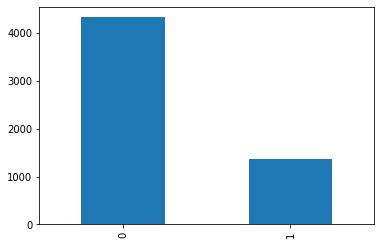

In [4]:
data["spam"].value_counts().plot(kind='bar')

In [5]:
data['text'] = data['text'].str.lower()

##### Contractions

In [8]:
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))
contractions_re

re.compile(r"(ain't|aren't|can't|can't've|'cause|could've|couldn't|couldn't've|didn't|doesn't|don't|hadn't|hadn't've|hasn't|haven't|he'd|he'd've|he'll|he'll've|he's|how'd|how'd'y|how'll|how's|I'd|I'd've|I'll|I'll've|I'm|I've|isn't|it'd|it'd've|it'll|it'll've|it's|let's|ma'am|mayn't|might've|mightn't|mightn't've|must've|mustn't|mustn't've|needn't|needn't've|o'clock|oughtn't|oughtn't've|shan't|sha'n't|shan't've|she'd|she'd've|she'll|she'll've|she's|should've|shouldn't|shouldn't've|so've|so's|that'd|that'd've|that's|there'd|there'd've|there's|they'd|they'd've|they'll|they'll've|they're|they've|to've|wasn't|we'd|we'd've|we'll|we'll've|we're|we've|weren't|what'll|what'll've|what're|what's|what've|when's|when've|where'd|where's|where've|who'll|who'll've|who's|who've|why's|why've|will've|won't|won't've|would've|wouldn't|wouldn't've|y'all|y'all'd|y'all'd've|y'all're|y'all've|you'd|you'd've|you'll|you'll've|you're|you've)",
re.UNICODE)

In [9]:
def expand_contractions(text, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)


In [10]:
data['text'] = data['text'].apply(lambda x: expand_contractions(x))

##### Punctuation

In [13]:
data['text'] = data['text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

##### Stop-words

In [15]:
engl_stopwords = set(stopwords.words('english'))

In [18]:
for word, count in Counter(" ".join(data["text"]).split()).most_common(11):
    if word not in engl_stopwords:
        engl_stopwords.add(word)

In [19]:
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in engl_stopwords])

In [20]:
data['text'] = data['text'].apply(lambda x: remove_stopwords(x))

##### Digits

In [21]:
data['text'] = data['text'].apply(lambda x: re.sub(r'\w*\d\w*','',x).strip())

##### Rephrase URLs

In [22]:
data['text'] = data['text'].apply(lambda x: re.sub('(http[s]?S+)|(w+.[A-Za-z]{2,4}S*)', 'urladd', x))

In [24]:
data.to_csv('data/email_spam.csv')